In [54]:
import sys
!{sys.executable} -m pip install pymoo
!{sys.executable} -m pip install -r requirements.txt

In [55]:
from pymoo.algorithms.moo.moead import MOEAD
from pymoo.optimize import minimize
from pymoo.problems import get_problem
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.visualization.scatter import Scatter
from pymoo.problems.functional import FunctionalProblem
from pymoo.operators.repair.rounding import RoundingRepair
from pymoo.operators.sampling.rnd import IntegerRandomSampling
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.util import plotting
from pymoo.operators.mutation.bitflip import BitflipMutation
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.operators.crossover.pntx import TwoPointCrossover
from pymoo.operators.mutation.bitflip import BitflipMutation
from pymoo.operators.sampling.rnd import BinaryRandomSampling
from pymoo.optimize import minimize
from pymoo.problems.single.knapsack import create_random_knapsack_problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.operators.crossover.pntx import TwoPointCrossover
from pymoo.operators.mutation.bitflip import BitflipMutation
from pymoo.operators.sampling.rnd import BinaryRandomSampling
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

import ctypes as ctypes
import matplotlib.pyplot as plt
import numpy as np
import json
import os
from datetime import datetime
from py_lib.generic import *

In [97]:
n_var =82

In [98]:

SAVE_DIR = "data_icsmd_100day"

#os.system("go build -buildmode=c-shared -o consensus.so consensus.go")

library = ctypes.cdll.LoadLibrary('./consensus.so')

conn1 = library.consensus_time1
conn1.argtypes = [ctypes.c_char_p]
conn1.restype = ctypes.c_void_p
conn2 = library.consensus_time2
conn2.argtypes = [ctypes.c_char_p]
conn2.restype = ctypes.c_void_p
conn3 = library.consensus_time3
conn3.argtypes = [ctypes.c_char_p]
conn3.restype = ctypes.c_void_p
conn4 = library.consensus_time4
conn4.argtypes = [ctypes.c_char_p]
conn4.restype = ctypes.c_void_p

completer_abs = library.consensus_completeness_abs
completer_abs.argtypes = [ctypes.c_char_p]
completer_abs.restype = ctypes.c_void_p

completer_per = library.consensus_completeness_per
completer_per.argtypes = [ctypes.c_char_p]
completer_per.restype = ctypes.c_void_p

counter_array = []
for i in range(n_var):
    counter_array.append(i)
counter_array = np.array(counter_array)
# print(counter_array)


MASSIVE = 60*1440*10*10
START_TIME = 1705065319

def fit1(x):
    genetics = counter_array[x.astype(bool)]
    genetics = genetics.astype(np.int64).tolist()
    # print(genetics)
    document = {
        "ids": genetics
    }
    out = conn1(json.dumps(document).encode('utf-8'))
    if out in [1,2,3,4]:
        return MASSIVE
    return out-START_TIME

def fit2(x):
    genetics = counter_array[x.astype(bool)]
    genetics = genetics.astype(np.int64).tolist()
    # print(genetics)
    document = {
        "ids": genetics
    }
    out = conn2(json.dumps(document).encode('utf-8'))
    if out in [1,2,3,4]:
        return MASSIVE
    return out-START_TIME

def fit3(x):
    genetics = counter_array[x.astype(bool)]
    genetics = genetics.astype(np.int64).tolist()
    # print(genetics)
    document = {
        "ids": genetics
    }
    out = conn3(json.dumps(document).encode('utf-8'))
    if out in [1,2,3,4]:
        return MASSIVE
    return out-START_TIME

def fit4(x):
    genetics = counter_array[x.astype(bool)]
    genetics = genetics.astype(np.int64).tolist()
    # print(genetics)
    document = {
        "ids": genetics
    }
    out = conn4(json.dumps(document).encode('utf-8'))
    if out in [1,2,3,4]:
        return MASSIVE
    return out-START_TIME

def completeness_abs(x):
    genetics = counter_array[x.astype(bool)]
    genetics = genetics.astype(np.int64).tolist()
    # print(genetics)
    document = {
        "ids": genetics
    }
    # print(genetics)
    out = completer_abs(json.dumps(document).encode('utf-8'))
    # if out == None:
    #     return 0
    # print(out)
    return out

def completeness_per(x):
    genetics = counter_array[x.astype(bool)]
    genetics = genetics.astype(np.int64).tolist()
    # print(genetics)
    document = {
        "ids": genetics
    }
    # print(genetics)
    out = completer_per(json.dumps(document).encode('utf-8'))
    # if out == None:
    #     return 0
    # print(out)
    return out/10000


objs = [
    lambda x: -completeness_per(x),
    lambda x: fit4(x)/MASSIVE,
    lambda x: -(np.sum(x))
]

constr_ieq = [
    lambda x: 4 - np.sum(x),    # Make sure num satellites is >=  4
    lambda x: np.sum(x) - 40    # Only calculate for num satellites up to 40 in subset
]
# num_sats >= 4
# 0 >= 4 - num_sats



problem = FunctionalProblem(n_var,
                            objs,
                            constr_ieq=constr_ieq
                            )


algorithm = NSGA2(pop_size=200,
                  sampling=BinaryRandomSampling(),
                  crossover=TwoPointCrossover(prob=0.1),
                  mutation=BitflipMutation(prob=0.1),
                  eliminate_duplicates=True,
                  save_history=True)

res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               verbose=True,
               save_history=True)


n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      200 |      3 |  0.000000E+00 |  2.4000000000 |             - |             -
     2 |      400 |      5 |  0.000000E+00 |  0.000000E+00 |  0.0681818182 |         ideal
     3 |      600 |      7 |  0.000000E+00 |  0.000000E+00 |  0.1518072289 |         ideal
     4 |      800 |      5 |  0.000000E+00 |  0.000000E+00 |  0.2576028623 |         ideal
     5 |     1000 |     10 |  0.000000E+00 |  0.000000E+00 |  0.1815519766 |         ideal
     6 |     1200 |      4 |  0.000000E+00 |  0.000000E+00 |  0.5236641221 |         ideal
     7 |     1400 |      4 |  0.000000E+00 |  0.000000E+00 |  0.1312997347 |         ideal
     8 |     1600 |      7 |  0.000000E+00 |  0.000000E+00 |  0.3323170732 |         ideal
     9 |     1800 |      6 |  0.000000E+00 |  0.000000E+00 |  0.8324022346 |         nadir
    10 |     2000 |      6 |  0.000000E+00 |  0.000000E+00 |  0.0013966480 |             f

In [100]:
output_X = []
output_F = []
for i in range(len(res.history)):
    output_X.append(res.history[i].pop.get("X").tolist())
    output_F.append(res.history[i].pop.get("F").tolist())
np.savez("run_x", *output_F)    
np.savez("run_f", *output_F)

[   27.    44.    65.    90.   119.   152.   189.   230.   275.   324.
   377.   434.   495.   560.   629.   702.   779.   860.   945.  1034.
  1127.  1224.  1325.  1430.  1539.  1652.  1769.  1890.  2015.  2144.
  2277.  2414.  2555.  2700.  2849.  3002.  3159.  3320.  3485.  3654.
  3827.  4004.  4185.  4370.  4559.  4752.  4949.  5150.  5355.  5564.
  5777.  5994.  6215.  6440.  6669.  6902.  7139.  7380.  7625.  7874.
  8127.  8384.  8645.  8910.  9179.  9452.  9729. 10010. 10295. 10584.
 10877. 11174. 11475. 11780. 12089. 12402. 12719. 13040. 13365.]


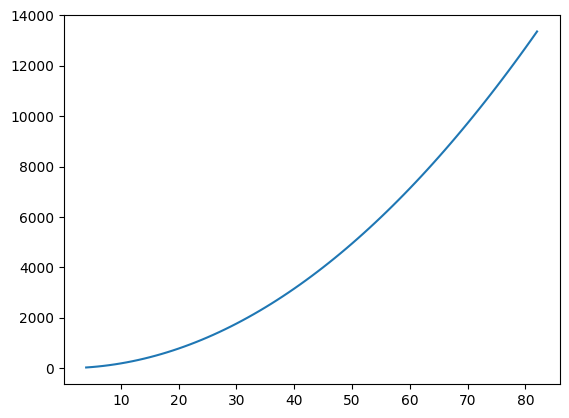

<Figure size 640x480 with 0 Axes>

In [58]:
x = np.linspace(4, 82, (82-4)+1)
y = ((2*x*x) - x) -1
print(y)
plt.plot(x,y)
plt.show()
plt.clf()

# For 3 objectives with completeness as an Objective

[[ -56.            6.93651374  -19.        ]
 [  -3.            6.93651374  -20.        ]
 [-142.            6.93651374  -18.        ]
 [-377.            6.93651374  -14.        ]
 [-231.            6.6196906   -11.        ]
 [ -66.            6.02803619   -6.        ]
 [-276.            6.68978446  -12.        ]
 [-245.            6.93651374  -15.        ]
 [-120.            6.38845095   -8.        ]
 [-325.            6.8800493   -13.        ]
 [-144.            6.93651374  -16.        ]
 [-120.            6.38845095   -8.        ]
 [ -45.            5.87127688   -5.        ]
 [-190.            6.56968565  -10.        ]
 [-325.            6.8800493   -13.        ]
 [ -28.            5.73019502   -4.        ]
 [-231.            6.6196906   -11.        ]
 [-153.            6.49244076   -9.        ]
 [ -91.            6.1846761    -7.        ]
 [ -28.            5.73019502   -4.        ]]


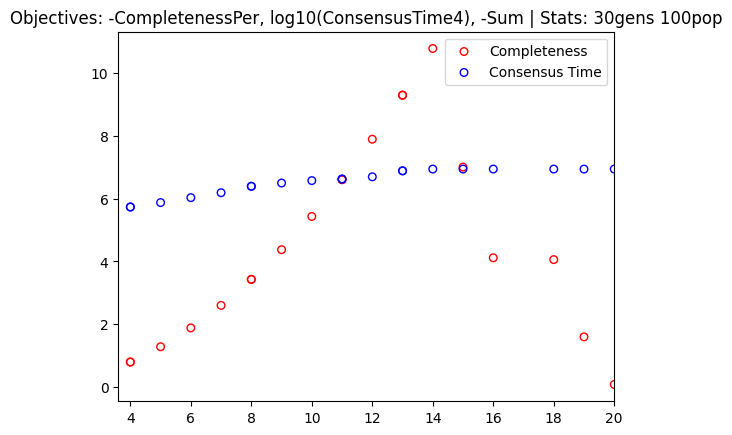

<Figure size 640x480 with 0 Axes>

In [78]:
F = res.F.copy()

print(F)

F[:,2] = -F[:,2]

plt.scatter(F[:, 2], -F[:, 0]/35, s=30, facecolors='none', edgecolors='red', label="Completeness")
plt.scatter(F[:, 2], F[:, 1], s=30, facecolors='none', edgecolors='blue', label="Consensus Time")
plt.legend()
plt.title("Objectives: -CompletenessPer, log10(ConsensusTime4), -Sum | Stats: 30gens 100pop")
plt.xlim([3.6,n_var])
plt.show()
plt.clf()

# All search history
(Prints alot of graphs)

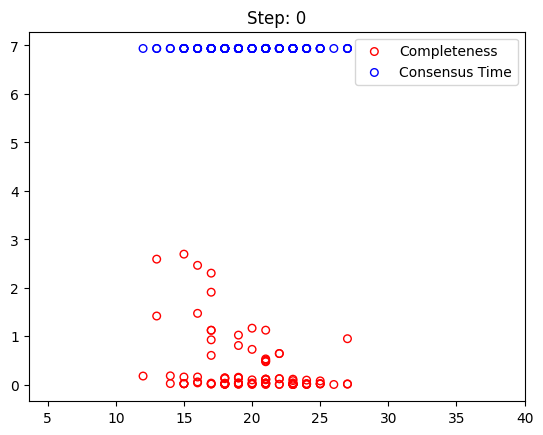

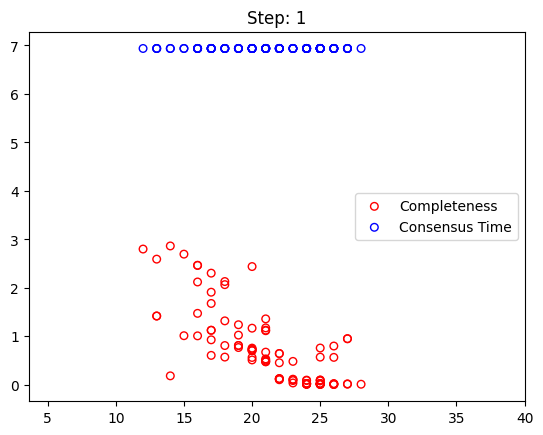

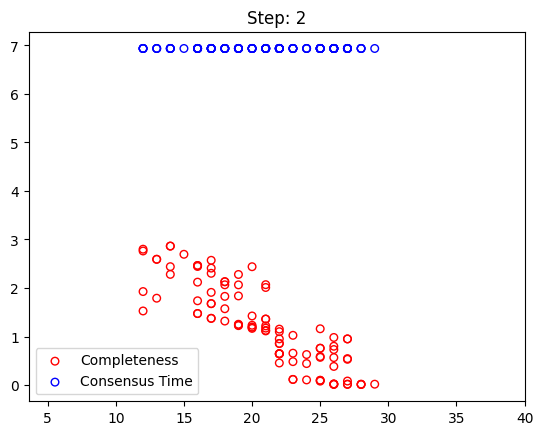

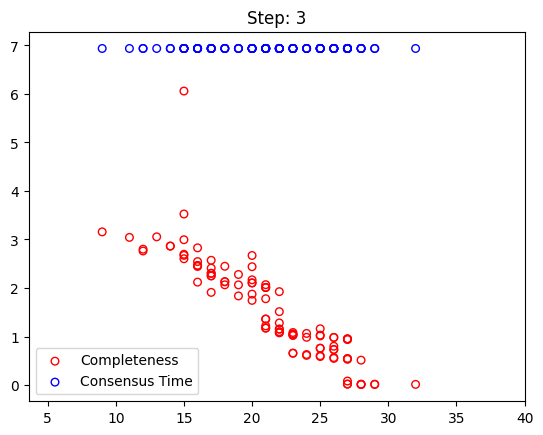

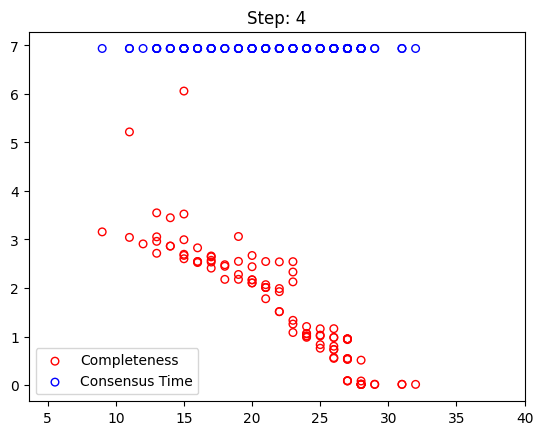

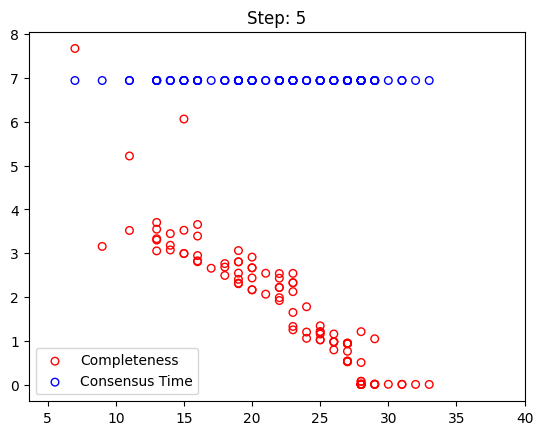

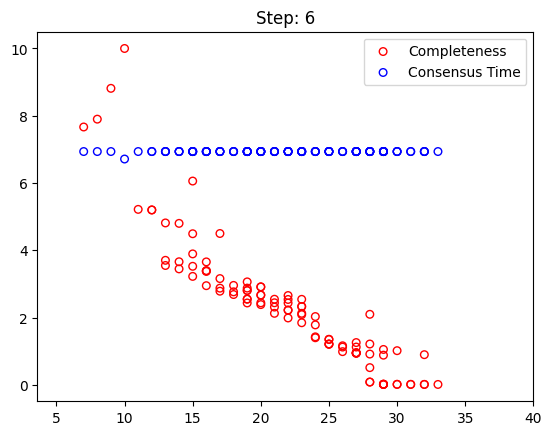

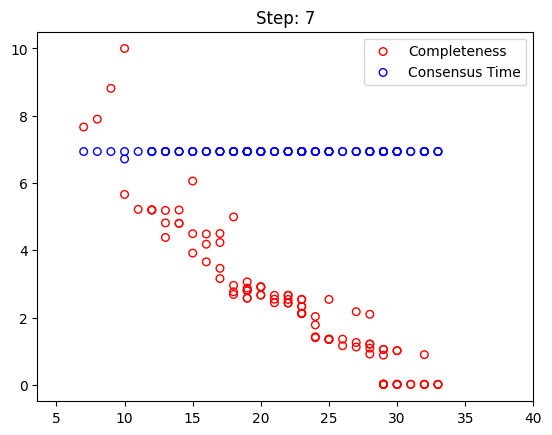

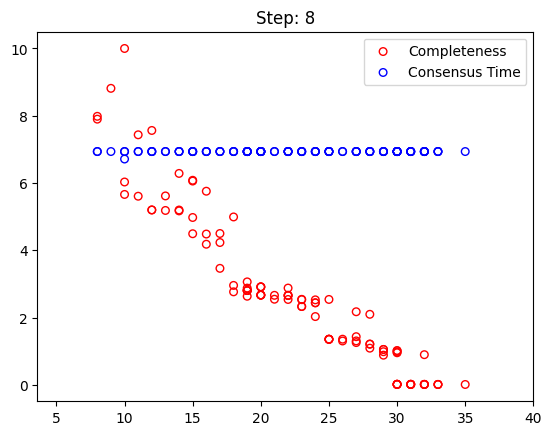

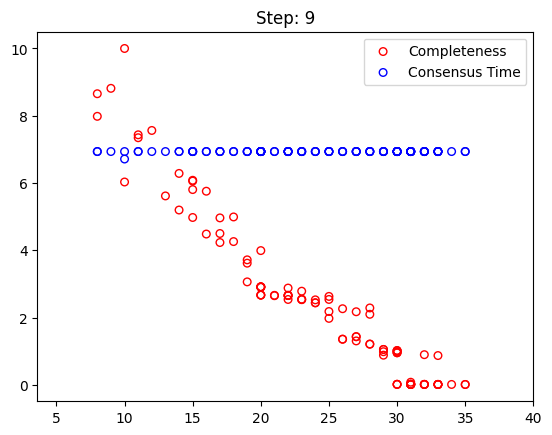

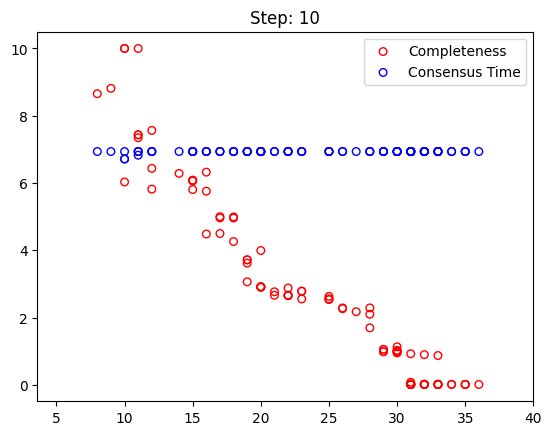

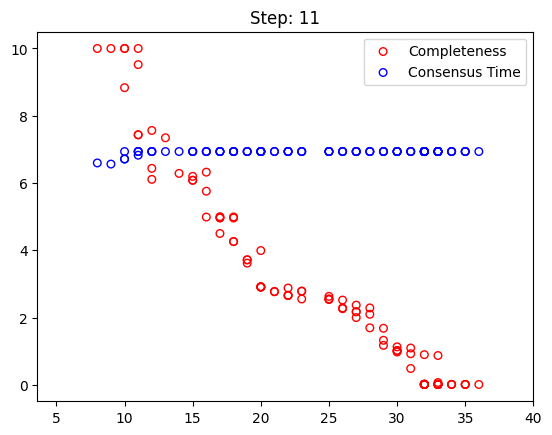

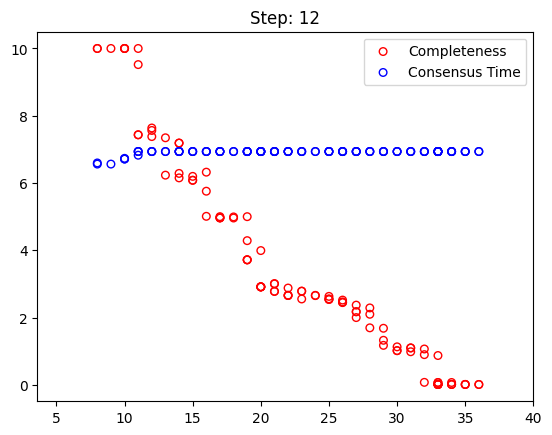

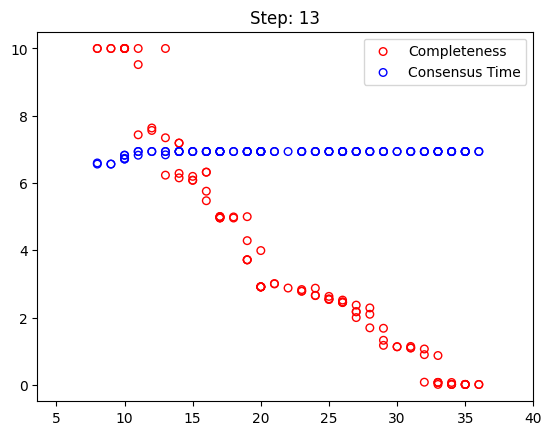

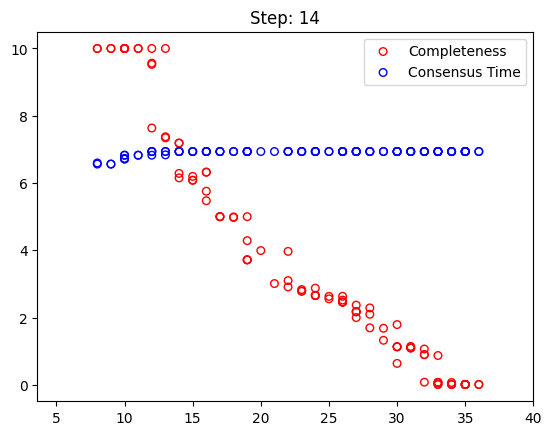

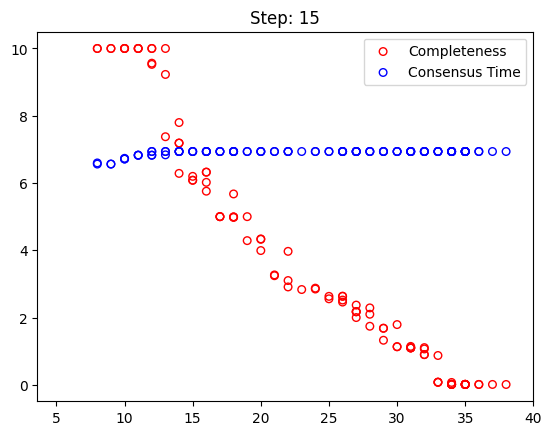

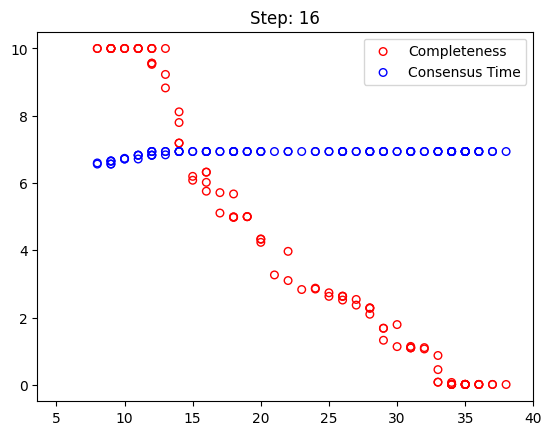

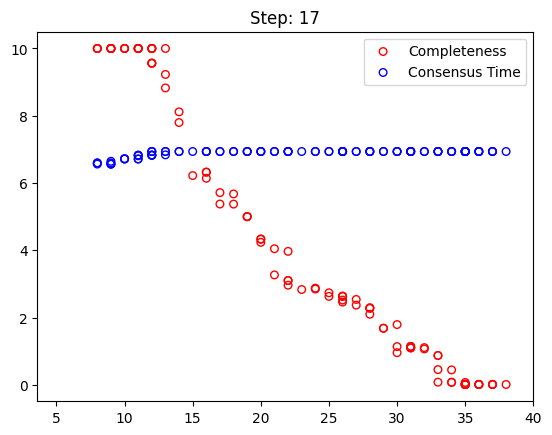

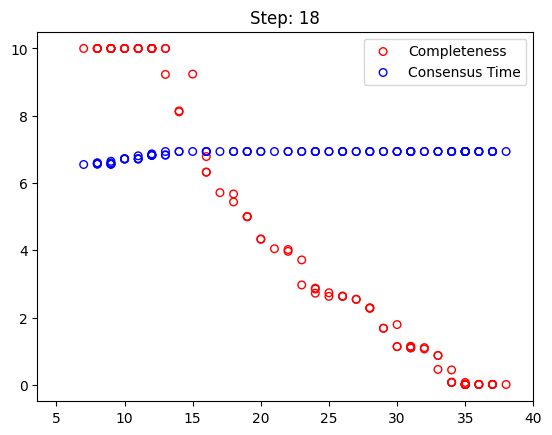

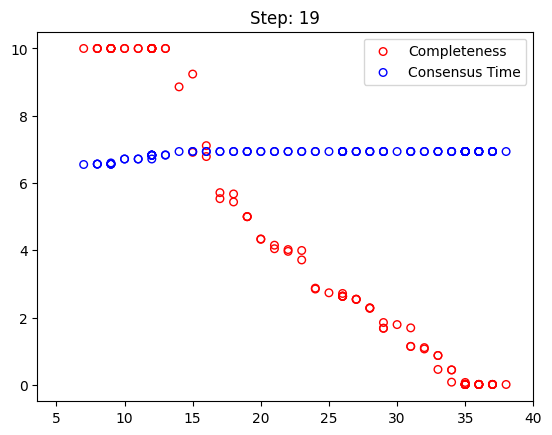

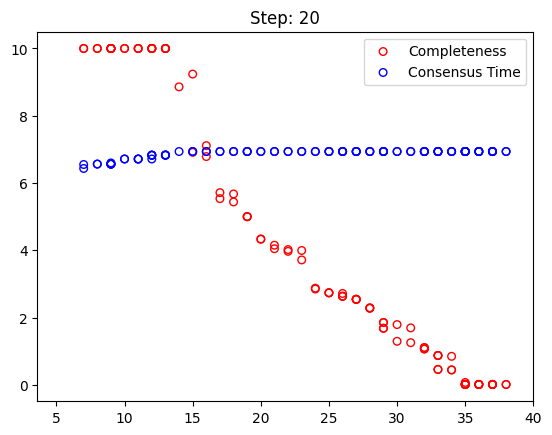

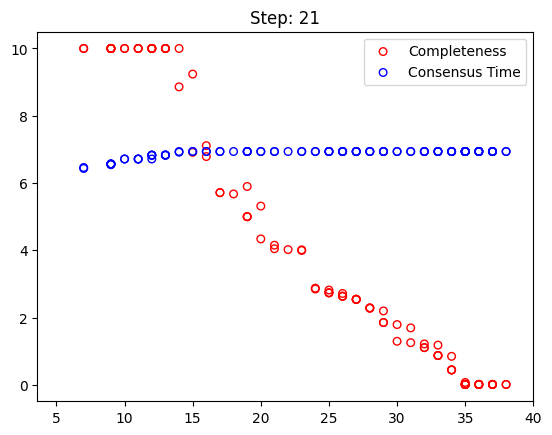

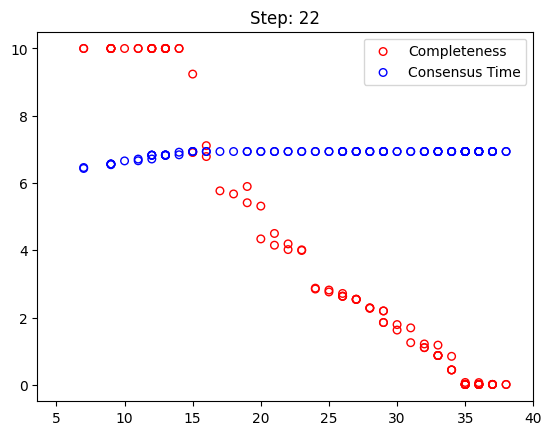

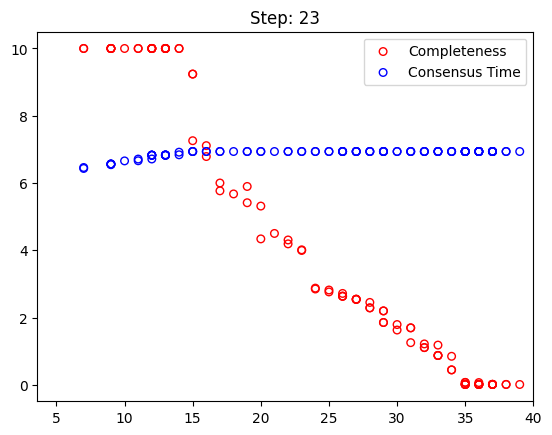

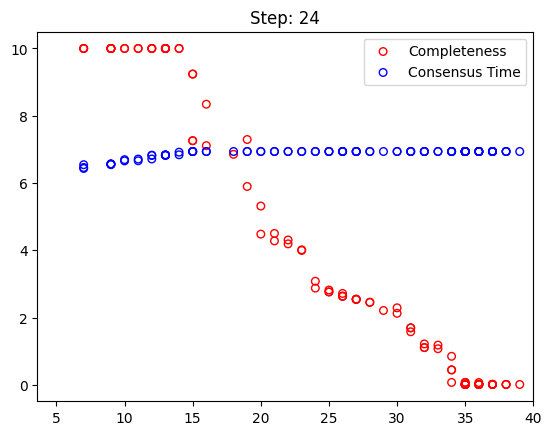

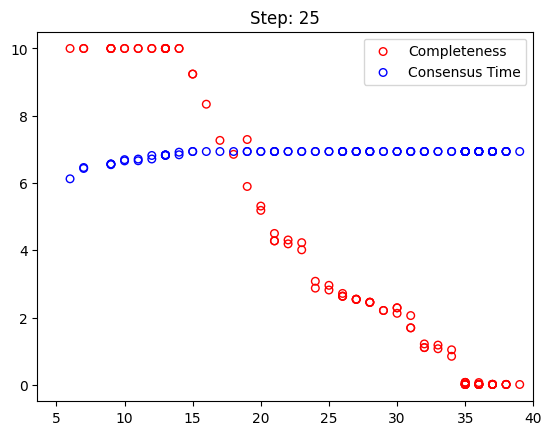

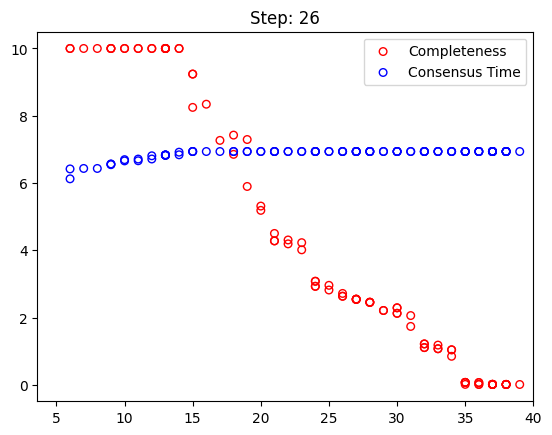

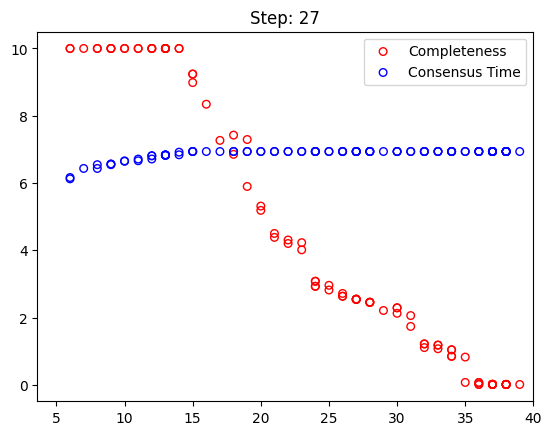

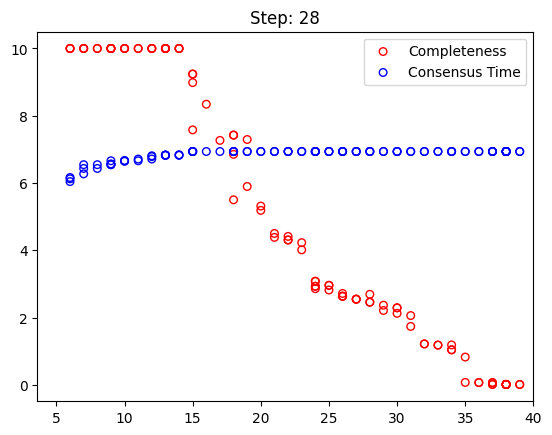

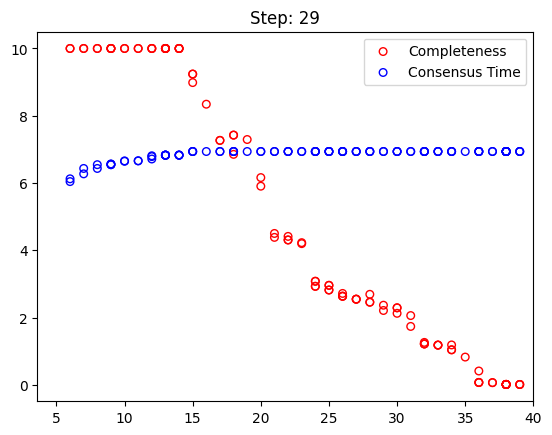

<Figure size 640x480 with 0 Axes>

In [60]:
for i in range(len(res.history)):
    F = res.history[i].pop.get("F").copy()

    F[:,2] = -F[:,2]

    plt.scatter(F[:, 2], -10*F[:, 0], s=30, facecolors='none', edgecolors='red', label="Completeness")
    plt.scatter(F[:, 2], F[:, 1], s=30, facecolors='none', edgecolors='blue', label="Consensus Time")
    plt.legend()
    plt.title("Step: "+str(i))
    plt.xlim([3.6,n_var])
    plt.show()
    plt.clf()